## Example using IRIS dataset

In [1]:

import pandas as pd

from scivae import VAE, Validate
from sciviso import Scatterplot

# Set the location of the mnist data
data_dir = '../tests/data/'
loss = {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 1}
encoding = {'layers':[{'num_nodes': 3, 'activation_fn': 'selu'}]} 
decoding = {'layers': [{'num_nodes': 3, 'activation_fn': 'selu'}]}
latent = {'num_nodes': 2}
optimisers = {'name': 'adam', 'params': {}}

config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers}

# Path to the data
data = f'{data_dir}iris.csv'

# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)

# Set up what the columns are
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)


None
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 3)            15          ['default_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 2)            8           ['dense[0][0]']                  
                                                                                                  
 z_log_sigma (Dense)            (None, 2)            8           ['dense[0][0]']                  
                                                                                       

2022-01-17 16:42:09.976444: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "VAE_vae_scivae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 4)]          0           []                               
                                                                                                  
 encoder (Functional)           [(None, 2),          31          ['default_input[0][0]']          
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 decoder (Functional)           (None, 4)            25          ['encoder[0][2]']                
                                                                                     

3/3 [==============================] - 1s 110ms/step - loss: 0.4518 - val_loss: 0.4242
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3719 - val_loss: 0.2951
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3453 - val_loss: 0.3843
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3436 - val_loss: 0.3126
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3128 - val_loss: 0.3327
Epoch 6/50
3/3 [==============================] - 0s 10ms/step - loss: 0.3014 - val_loss: 0.3212
Epoch 7/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2932 - val_loss: 0.2989
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2863 - val_loss: 0.3230
Epoch 9/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2844 - val_loss: 0.4056
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3059 - val_loss: 0.3660
Epoch 11/50
3/3 [============================

## Visualise the latent space

Visualise and colour the latent space.


<AxesSubplot:title={'center':'Latent space coloured by class'}, xlabel='VAE 0', ylabel='VAE 1'>

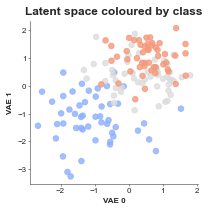

In [4]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class',
                      xlabel='VAE 0', ylabel='VAE 1')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [3]:

vd = Validate(vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.6956521739130435
0.7000000000000001
